#### Decision Tree Classifier

In [51]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [52]:
from sklearn.datasets import load_iris


In [53]:

iris = load_iris()

In [54]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [55]:
##independent feture 
X = pd.DataFrame(iris['data'],columns=['sepal length','sepal width','petal length','petal width'])

In [56]:
X.head()

sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

In [57]:
## dependent feature 
y = pd.DataFrame(iris['target'],columns=['output'])

In [58]:
y.head()

output
0       0
1       0
2       0
3       0
4       0

In [59]:
## train test split 
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size =0.25 , random_state = 42)

In [60]:
## decision tree classifier 
from sklearn.tree import DecisionTreeClassifier 

In [61]:
trees = DecisionTreeClassifier(max_depth=2)

In [62]:
trees.fit(X_train , y_train )

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.666\nsamples = 112\nvalue = [35, 39, 38]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[2] <= 4.75\ngini = 0.5\nsamples = 77\nvalue = [0.0, 39.0, 38.0]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.21\nsamples = 42\nvalue = [0, 5, 37]')]

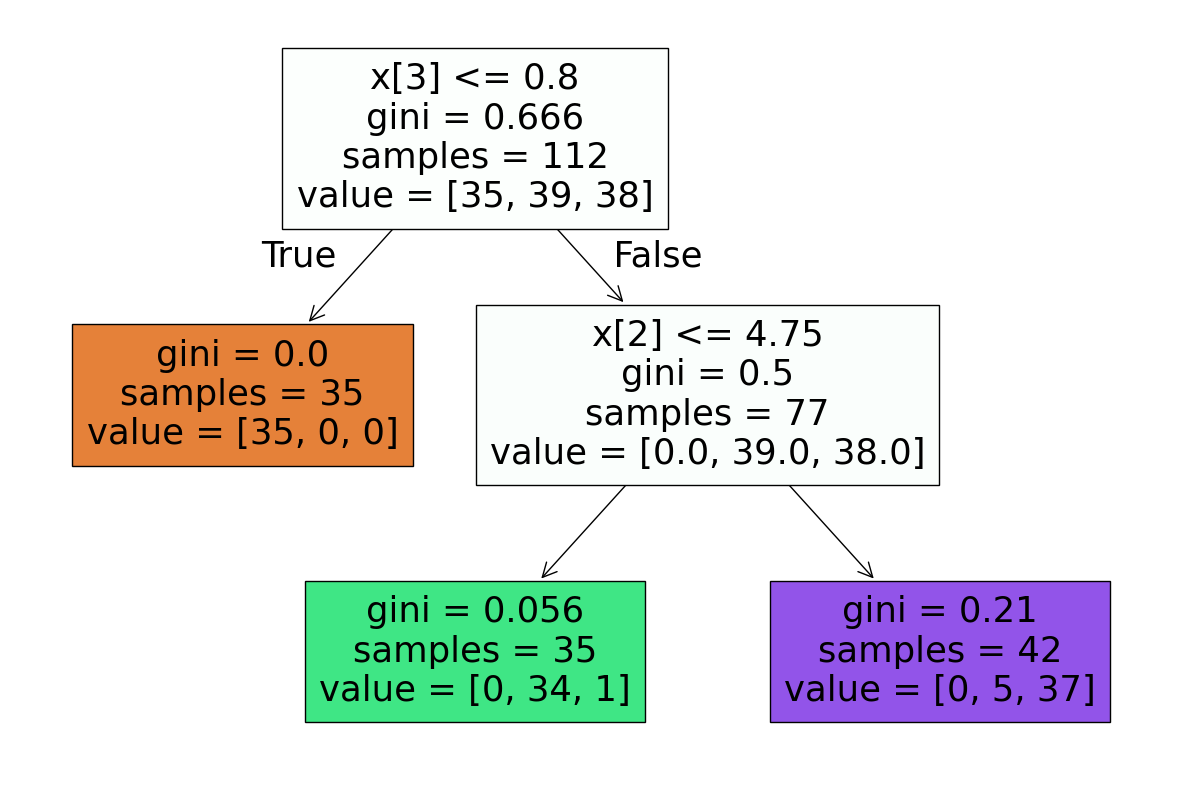

In [63]:
## visualize the decision tree 
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(trees,filled=True)

In [64]:
y_pred = trees.predict(X_test)

In [65]:
from sklearn.metrics import confusion_matrix , classification_report 

In [66]:
cm = confusion_matrix(y_test,y_pred)

In [67]:
cm

array([[15,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 12]], dtype=int64)

In [68]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



#### Prepruning

In [69]:
param={
    'criterion':['gini','entropy', 'log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [70]:
param

{'criterion': ['gini', 'entropy', 'log_loss'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5],
 'max_features': ['auto', 'sqrt', 'log2']}

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
treemodel = DecisionTreeClassifier()

In [73]:
grid = GridSearchCV(treemodel , param_grid=param , cv=5,scoring='accuracy')

In [74]:
grid.fit(X_train,y_train)

c:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\user\anaconda3\Lib\site-packages\sk

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [75]:
grid.best_params_

{'criterion': 'log_loss',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [76]:
grid.best_score_

0.9549407114624506

In [77]:
y_pred = grid.predict(X_test)

In [78]:
y_pred

array([1, 0, 2, 2, 2, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0])

In [79]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[15  0  0]
 [ 0  6  5]
 [ 0  0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.55      0.71        11
           2       0.71      1.00      0.83        12

    accuracy                           0.87        38
   macro avg       0.90      0.85      0.84        38
weighted avg       0.91      0.87      0.86        38



In [80]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [81]:
score

0.868421052631579